In [1]:
import pandas as pd
import re
%matplotlib inline

sharks = pd.read_csv("input/attacks.csv", encoding="latin1")

In [2]:
# Mostramos los 5 primeros elementos de la tabla.

sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
# Hacemos una primera limpieza de datos comprobando si tenemos registros duplicados.

sharks1 = sharks.duplicated().value_counts()
sharks1

True     19411
False     6312
dtype: int64

In [4]:
# Vemos que hay 19411 registros que indican True, lo que significa que son registros duplicados. Los limpiamos.

sharks2 = sharks.drop_duplicates().reset_index()
sharks2

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6310,8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Vamos a consultar ahora que datos tenemos en cada columna, para ello hacemos una llamada a las mismas.

sharks2.columns

Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'Case Number.1', 'Case Number.2', 'original order',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [6]:
""" Como vemos que dentro existen algunos index que tienen espacio entre
el final de la palabra y la comilla, renombramos las columnas para arreglarlo """

sharks2.columns=['index','Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23']

In [7]:
# Comprobamos que los cambios se han hecho efectivos.

sharks2.columns

Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [8]:
# Una vez consultados los datos que nos aporta la tabla, vamos a realizar los siguientes análisis:
# 1) Vamos a ver los 10 países en los que se han producido más ataques.
# 2) Vamos a ver los 10 países en los que se han producido más ataques mortales y no mortales.
# 3) Vamos a extraer los 5 paises más atacados para realizar una comparativa grafica entre ellos.
# 4) Vamos a comprobar la evolución de los ataques a los largo de las últimas 10 décadas.
# 5) Por último, vamos a realizar un pequeño resumen para ver cuales son los valores máximos y mínimos.

#Para ello, vamos a seleccionar las columnas Year, Country y Fatal.

sharks_attacks=sharks2[["Year", "Country", "Fatal"]]
sharks_attacks

,Year,Country,Fatal
0,2018.0,USA,N
1,2018.0,USA,N
2,2018.0,USA,N
3,2018.0,AUSTRALIA,N
4,2018.0,MEXICO,N
...,...,...,...
6307,NaN,NaN,NaN
6308,NaN,NaN,NaN
6309,NaN,NaN,NaN
6310,NaN,NaN,NaN


In [9]:
# Comprobamos la cantidad de valores "NaN" que tenemos en la columna Year.

sharks_attacks["Year"].isnull().value_counts()

False    6300
True       12
Name: Year, dtype: int64

In [10]:
# Comprobamos la cantidad de valores "NaN" que tenemos en la columna Country.

sharks_attacks["Country"].isnull().value_counts()

False    6252
True       60
Name: Country, dtype: int64

In [11]:
# Comprobamos la cantidad de valores "NaN" que tenemos en la columna Fatal.

sharks_attacks["Fatal"].isnull().value_counts()

False    5763
True      549
Name: Fatal, dtype: int64

In [12]:
#Eliminamos los valores NaN por orden descendiente de valores nulos, por si así podemos evitarnos algún filtrado.

sharks_attacks1 = sharks_attacks[~sharks_attacks["Fatal"].isnull()]
[["Year","Country", "Fatal"]]
sharks_attacks1

,Year,Country,Fatal
0,2018.0,USA,N
1,2018.0,USA,N
2,2018.0,USA,N
3,2018.0,AUSTRALIA,N
4,2018.0,MEXICO,N
...,...,...,...
6297,0.0,AUSTRALIA,Y
6298,0.0,AUSTRALIA,Y
6299,0.0,USA,Y
6300,0.0,PANAMA,Y


In [13]:
sharks_attacks2 = sharks_attacks1[~sharks_attacks1["Country"].isnull()]
[["Year","Country", "Fatal"]]
sharks_attacks2

,Year,Country,Fatal
0,2018.0,USA,N
1,2018.0,USA,N
2,2018.0,USA,N
3,2018.0,AUSTRALIA,N
4,2018.0,MEXICO,N
...,...,...,...
6297,0.0,AUSTRALIA,Y
6298,0.0,AUSTRALIA,Y
6299,0.0,USA,Y
6300,0.0,PANAMA,Y


In [14]:
clean_sharks_attacks = sharks_attacks2[~sharks_attacks2["Year"].isnull()]
[["Year", "Country", "Fatal"]]
clean_sharks_attacks

,Year,Country,Fatal
0,2018.0,USA,N
1,2018.0,USA,N
2,2018.0,USA,N
3,2018.0,AUSTRALIA,N
4,2018.0,MEXICO,N
...,...,...,...
6297,0.0,AUSTRALIA,Y
6298,0.0,AUSTRALIA,Y
6299,0.0,USA,Y
6300,0.0,PANAMA,Y


In [15]:
# Eliminamos también los años desconocidos (Valores = 0) para no desvirtuar el análisis.

clean_sharks_attacks = clean_sharks_attacks.drop(clean_sharks_attacks[clean_sharks_attacks["Year"]==0.0].index)
clean_sharks_attacks

,Year,Country,Fatal
0,2018.0,USA,N
1,2018.0,USA,N
2,2018.0,USA,N
3,2018.0,AUSTRALIA,N
4,2018.0,MEXICO,N
...,...,...,...
6170,1580.0,Between PORTUGAL & INDIA,Y
6172,1554.0,FRANCE,UNKNOWN
6173,1543.0,VENEZUELA,Y
6174,500.0,MEXICO,N


In [16]:
# Como los valores de la columna Year son float, vamos a transformalos a tipo integer.

clean_sharks_attacks["Year"] = clean_sharks_attacks["Year"].astype(int)
clean_sharks_attacks

,Year,Country,Fatal
0,2018,USA,N
1,2018,USA,N
2,2018,USA,N
3,2018,AUSTRALIA,N
4,2018,MEXICO,N
...,...,...,...
6170,1580,Between PORTUGAL & INDIA,Y
6172,1554,FRANCE,UNKNOWN
6173,1543,VENEZUELA,Y
6174,500,MEXICO,N


In [17]:
# Vamos a comprobar ahora si tenemos valores raros en cada una de las columnas seleccionadas.
# Primero vamos a ordenar los mismos, y luego sacamos los valores únicos para que no se repitan.
# Comenzamos por los años.

sort_year=clean_sharks_attacks["Year"].sort_values()
sort_year.unique()

array([   5,  500, 1543, 1554, 1580, 1595, 1617, 1637, 1642, 1700, 1703,
       1721, 1738, 1748, 1749, 1751, 1753, 1755, 1758, 1764, 1771, 1776,
       1779, 1780, 1783, 1784, 1785, 1786, 1788, 1791, 1792, 1800, 1802,
       1803, 1804, 1807, 1808, 1810, 1812, 1815, 1816, 1817, 1822, 1825,
       1826, 1827, 1828, 1829, 1830, 1831, 1832, 1834, 1835, 1836, 1837,
       1839, 1840, 1841, 1842, 1844, 1845, 1846, 1847, 1848, 1849, 1850,
       1851, 1852, 1853, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862,
       1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873,
       1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884,
       1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895,
       1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906,
       1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917,
       1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 19

In [18]:
# No se aprecian errores

In [19]:
# Realizamos ahora el mismo proceso con los paises.

sort_countries=clean_sharks_attacks["Country"].sort_values()
sort_countries.unique()

array([' PHILIPPINES', ' TONGA', 'ADMIRALTY ISLANDS', 'AFRICA', 'ALGERIA',
       'AMERICAN SAMOA', 'ANDAMAN / NICOBAR ISLANDAS', 'ANDAMAN ISLANDS',
       'ANGOLA', 'ARGENTINA', 'ARUBA', 'ATLANTIC OCEAN', 'AUSTRALIA',
       'AZORES', 'BAHAMAS', 'BANGLADESH', 'BARBADOS', 'BAY OF BENGAL',
       'BELIZE', 'BERMUDA', 'BRAZIL', 'BRITISH ISLES',
       'BRITISH NEW GUINEA', 'BRITISH WEST INDIES', 'BURMA',
       'Between PORTUGAL & INDIA', 'CANADA', 'CAPE VERDE',
       'CARIBBEAN SEA', 'CENTRAL PACIFIC', 'CEYLON', 'CHILE', 'CHINA',
       'COLUMBIA', 'COOK ISLANDS', 'COSTA RICA', 'CRETE', 'CROATIA',
       'CUBA', 'CURACAO', 'CYPRUS', 'Coast of AFRICA', 'DIEGO GARCIA',
       'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT', 'EGYPT ',
       'EGYPT / ISRAEL', 'EL SALVADOR', 'ENGLAND',
       'EQUATORIAL GUINEA / CAMEROON', 'FALKLAND ISLANDS',
       'FEDERATED STATES OF MICRONESIA', 'FIJI', 'FRANCE',
       'FRENCH POLYNESIA', 'Fiji', 'GABON', 'GEORGIA', 'GHANA',
       'GRAND CAYMAN', 'GREECE',

In [20]:
# Vemos que existen varias erratas por lo que vamos a proceder a corregirlos.

clean_sharks_attacks.Country = clean_sharks_attacks.Country.replace({" PHILIPPINES": "PHILIPPINES",
                                                                     " TONGA":"TONGA",
                                                                     "Between PORTUGAL & INDIA": "INDIA",
                                                                     "Coast of AFRICA": "SAO TOME ISLAND",
                                                                     "EQUATORIAL GUINEA / CAMEROON": "EQUATORIAL GUINEA",
                                                                     "EGYPT ": "EGYPT",
                                                                     "EGYPT / ISRAEL": "EGYPT",
                                                                     "Fiji": "FIJI",
                                                                     "IRAN / IRAQ": "IRAN",
                                                                     "MALDIVE ISLANDS": "MALDIVES",
                                                                     "MEXICO ":"MEXICO",
                                                                     "EGYPT ": "EGYPT",
                                                                     "NICARAGUA ": "NICARAGUA", 
                                                                     "NORTH ATLANTIC OCEAN ":"NORTH ATLANTIC OCEAN",
                                                                     "PACIFIC OCEAN ": "PACIFIC OCEAN",
                                                                     "ST HELENA, British overseas territory": "ST. HELENA",
                                                                     "ST. MAARTIN":"ST. MARTIN",
                                                                     "Sierra Leone": "SIERRA LEONE", 
                                                                     "UNITED ARAB EMIRATES (UAE)":"UNITED ARAB EMIRATES",
                                                                     "YEMEN ": "YEMEN"
                                                                    })

In [21]:
# Realizamos ahora el mismo proceso con el tipo de ataque.

sort_countries=clean_sharks_attacks["Fatal"].sort_values()
sort_countries.unique()

array([' N', '2017', 'M', 'N', 'N ', 'UNKNOWN', 'Y', 'y'], dtype=object)

In [22]:
#Vamos a localizar si los casos que tienen errata supusieron la muerte o no.

comprobación = sharks2[["Year","Country", "Fatal", "Injury", "href"]]
comprobación

,Year,Country,Fatal,Injury,href
0,2018.0,USA,N,"No injury to occupant, outrigger canoe and pad...",http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.0,USA,N,Minor injury to left thigh,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.0,USA,N,Injury to left lower leg from surfboard skeg,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018.0,AUSTRALIA,N,Minor injury to lower leg,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018.0,MEXICO,N,Lacerations to leg & hand shark PROVOKED INCIDENT,http://sharkattackfile.net/spreadsheets/pdf_di...
...,...,...,...,...,...
6307,NaN,NaN,NaN,NaN,NaN
6308,NaN,NaN,NaN,NaN,NaN
6309,NaN,NaN,NaN,NaN,NaN
6310,NaN,NaN,NaN,NaN,NaN


In [23]:
#Vamos a buscar ahora las filas en las que existen erratas.

comprobación [(comprobación["Fatal"] == "2017")]

,Year,Country,Fatal,Injury,href
786,2012.0,ITALY,2017,Lower left leg injured PROVOKED ACCIDENT,http://sharkattackfile.net/spreadsheets/pdf_di...


In [24]:
comprobación [(comprobación["Fatal"] == "M")] 

,Year,Country,Fatal,Injury,href
285,2016.0,FRENCH POLYNESIA,M,Laceration to knee by speared shark PROVOKED I...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [25]:
comprobación [(comprobación["Fatal"] == " N")] 

,Year,Country,Fatal,Injury,href
3942,1960.0,AUSTRALIA,N,"Shark brushed past, minor injuries if any",http://sharkattackfile.net/spreadsheets/pdf_di...
3944,1960.0,AUSTRALIA,N,Left thigh lacerated,http://sharkattackfile.net/spreadsheets/pdf_di...
3946,1960.0,AUSTRALIA,N,Right shoulder lacerated,http://sharkattackfile.net/spreadsheets/pdf_di...
3948,1960.0,AUSTRALIA,N,"Shark knocked him off surf-ski, he inhaled wat...",http://sharkattackfile.net/spreadsheets/pdf_di...
3949,1960.0,AUSTRALIA,N,Scratches on right upper arm,http://sharkattackfile.net/spreadsheets/pdf_di...
3951,1960.0,NEW GUINEA,N,Left wrist bitten by netted shark placed in bo...,http://sharkattackfile.net/spreadsheets/pdf_di...
3956,1960.0,PAPUA NEW GUINEA,N,Injuries to leg & foot,http://sharkattackfile.net/spreadsheets/pdf_di...


In [26]:
comprobación [(comprobación["Fatal"] == "y")]

,Year,Country,Fatal,Injury,href
6117,1815.0,TOBAGO,y,FATAL,http://sharkattackfile.net/spreadsheets/pdf_di...


In [27]:
# De lo anterior, observamos que los valores "N" e "y" son erratas menores a la hora de introducir los valores.
# En el caso del valor "M" vemos la noticia y observamos que se trata de una lesión que no causa la muerte.
# En el caso del valor "2017" vemos la noticia y observamos que se trata de una lesión que no causa la muerte.
# Por lo tanto, vamos a proceder a realizar los cambios oportunos.

clean_sharks_attacks.Fatal = clean_sharks_attacks.Fatal.str.replace(r" ?N{1} ?", "N")
clean_sharks_attacks.Fatal = clean_sharks_attacks.Fatal.str.replace(r"M{1}", "N")
clean_sharks_attacks.Fatal = clean_sharks_attacks.Fatal.str.replace(r"y{1}", "Y")
clean_sharks_attacks.Fatal = clean_sharks_attacks.Fatal.str.replace(r"2017{1}", "N")


In [28]:
# Comprobamos que los cambios ha sido realizados.

clean_sharks_attacks["Fatal"].value_counts()

N          4222
Y          1307
UNKNOWN      68
Name: Fatal, dtype: int64

,Country
USA,2025
AUSTRALIA,1209
SOUTH AFRICA,507
PAPUA NEW GUINEA,128
NEW ZEALAND,115
BRAZIL,104
BAHAMAS,101
MEXICO,79
FIJI,61
PHILIPPINES,58


<AxesSubplot:>

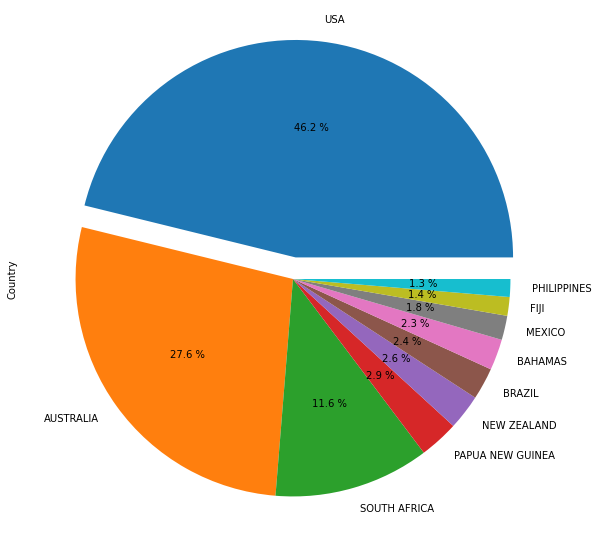

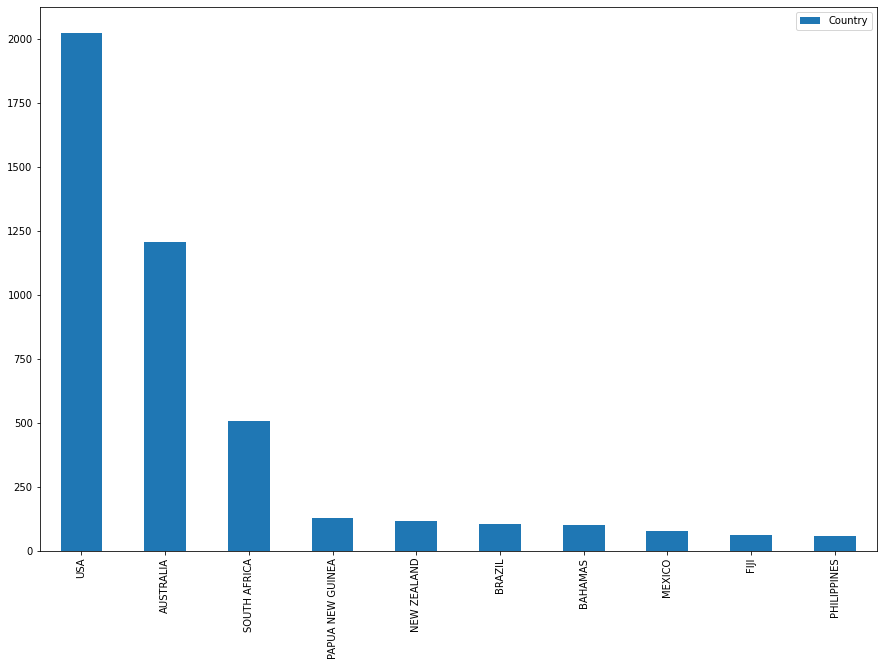

In [29]:
#Vamos a comprobar ahora cuales han sido los 10 paises más atacados.

total=clean_sharks_attacks["Country"].value_counts()
most_attacked=pd.DataFrame(total)
display(most_attacked.head(10))
desfase = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
total.head(10).plot.pie(autopct="%0.1f %%", explode=desfase, figsize=(15,10))
most_attacked.head(10).plot.bar(figsize=(15,10))


Country
Fatal Country                  
Y     AUSTRALIA             275
      USA                   183
      SOUTH AFRICA           99
      PAPUA NEW GUINEA       54
      MEXICO                 43
      BRAZIL                 38
      PHILIPPINES            36
      REUNION                28
      CUBA                   23
      NEW ZEALAND            23

<AxesSubplot:xlabel='Fatal,Country'>

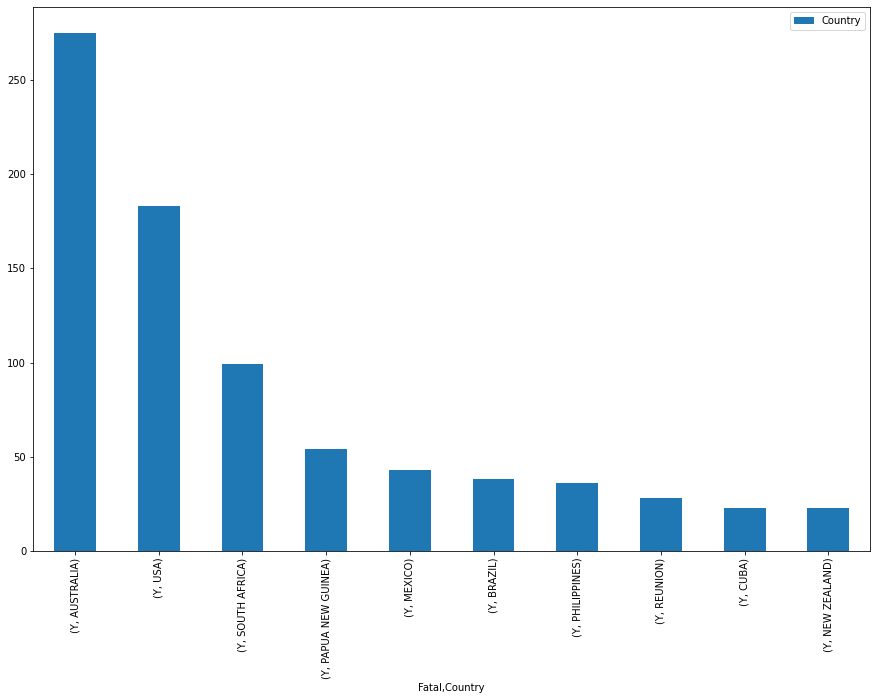

In [30]:
#Vamos a comprobar ahora cuales han sido los 10 paises con más muertes por ataque.

deads=clean_sharks_attacks[clean_sharks_attacks.Fatal.isin(["Y"])]
analysis1 = deads.groupby(["Fatal"]).agg({"Country":"value_counts"})
display(analysis1.head(10))
analysis1.head(10).plot.bar(figsize=(15,10))

Country
Fatal Country                  
N     USA                  1824
      AUSTRALIA             914
      SOUTH AFRICA          406
      BAHAMAS                91
      NEW ZEALAND            91
      PAPUA NEW GUINEA       72
      BRAZIL                 64
      ITALY                  40
      FIJI                   38
      MEXICO                 36

<AxesSubplot:xlabel='Fatal,Country'>

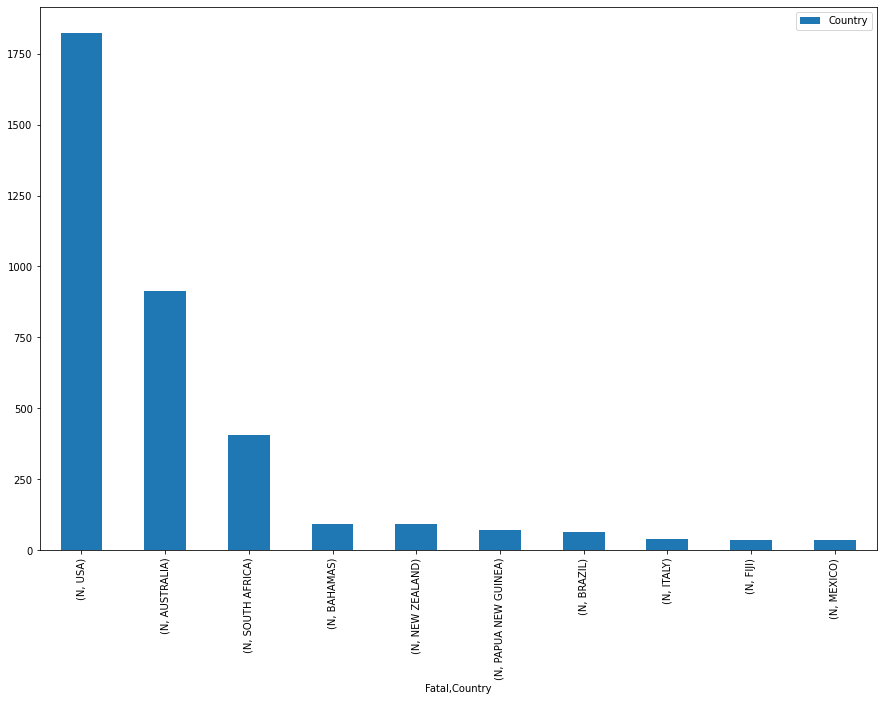

In [31]:
#Vamos a comprobar ahora cuales han sido los 10 paises con más ataques que no han causado la muerte.

survivors=clean_sharks_attacks[clean_sharks_attacks.Fatal.isin(["N"])]
analysis2 = survivors.groupby(["Fatal"]).agg({"Country":"value_counts"})
display(analysis2.head(10))
analysis2.head(10).plot.bar(figsize=(15,10))

Fatal
Country          Fatal         
USA              N         1824
                 Y          183
                 UNKNOWN     18
AUSTRALIA        N          914
                 Y          275
                 UNKNOWN     20
SOUTH AFRICA     N          406
                 Y           99
                 UNKNOWN      2
PAPUA NEW GUINEA N           72
                 Y           54
                 UNKNOWN      2
NEW ZEALAND      N           91
                 Y           23
                 UNKNOWN      1

<AxesSubplot:xlabel='Country,Fatal'>

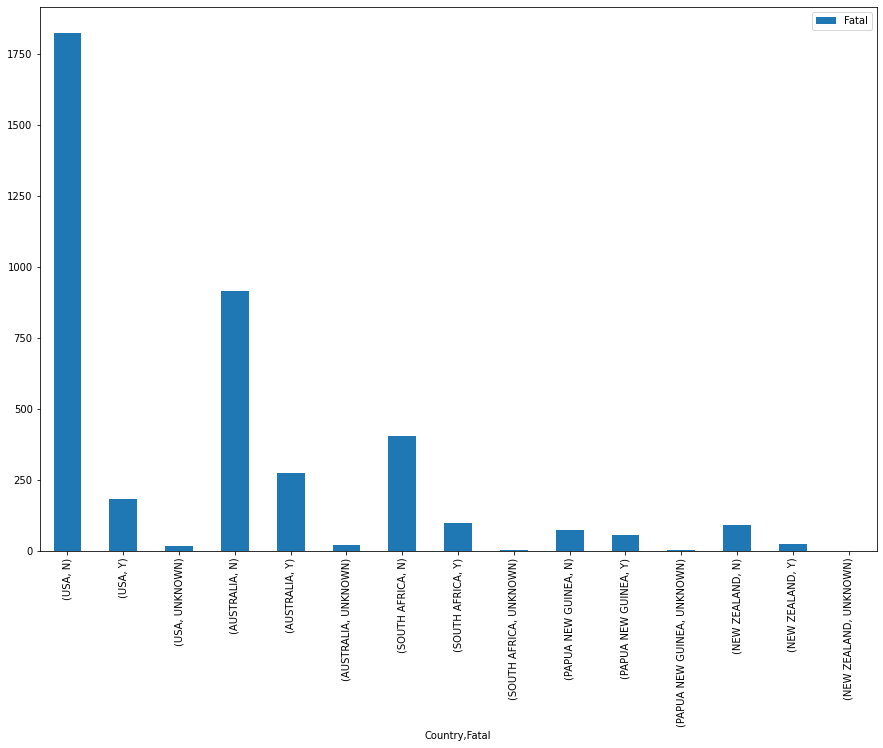

In [32]:
# Vemos ahora una comparativa con los 5 paises más atacados y por tipo de ataque.

comp=clean_sharks_attacks.groupby("Country").agg({"Fatal":"value_counts"})
comparativa=comp.loc[["USA", "AUSTRALIA", "SOUTH AFRICA", "PAPUA NEW GUINEA", "NEW ZEALAND"], :]
display(comparativa)
comparativa.plot.bar(figsize=(15,10))

In [33]:
# Analizamos entre sí, los valores de los 2 paises con mayor número de ataques

analysis3 = comparativa.loc["AUSTRALIA", :]/comparativa.loc["USA", :]
analysis3.columns=["Relación"]
analysis3

,Relación
Fatal,
N,0.501096
Y,1.502732
UNKNOWN,1.111111


In [34]:
# Vamos a analizar ahora la evolución de los ataques registrados en las últimas 10 décadas.
# Para ello, creamos una columna década que incluya las últimas 10 décadas.

bins = [1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]
labels = list(range(1920, 2020, 10))
clean_sharks_attacks["Decade"] = pd.cut(clean_sharks_attacks.Year,
                                bins=bins, 
                                labels=labels)

In [35]:
# Eliminamos ahora aquellos valores que se quedan fuera de dicha décadas.

decade=clean_sharks_attacks[["Decade", "Fatal"]]
clean_decade = decade[~decade["Decade"].isnull()]

Fatal
Decade Fatal         
1920   N          115
       Y           72
       UNKNOWN      1
1930   N          162
       Y           83
       UNKNOWN      5
1940   N          156
       Y           99
       UNKNOWN      2
1950   N          286
       Y          134
       UNKNOWN      6
1960   N          419
       Y          112
       UNKNOWN     10
1970   N          240
       Y           68
       UNKNOWN      3
1980   N          324
       Y           51
       UNKNOWN     11
1990   N          440
       Y           89
       UNKNOWN     11
2000   N          835
       Y          101
       UNKNOWN      1
2010   N          904
       Y           74
       UNKNOWN      1

<AxesSubplot:xlabel='Decade,Fatal'>

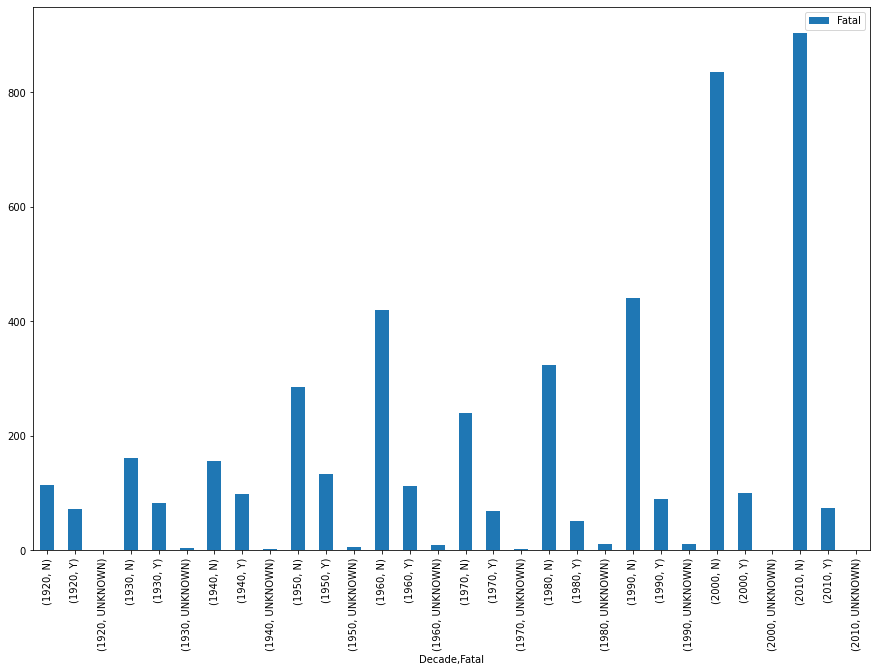

In [36]:
# A continuación observamos cual ha sido la evolución durante los últimos 10 años.

analysis4=clean_decade.groupby(["Decade"]).agg({"Fatal": "value_counts"})
display(analysis4)
analysis4.plot.bar(figsize=(15,10))

In [37]:
#Exportar archivos

clean_sharks_attacks.to_csv("output/clean_sharks_attacks.csv")
analysis1.to_csv("output/ataques mortales.csv")
analysis2.to_csv("output/ataques no mortales.csv")
comparativa.to_csv("output/comparativa.csv")